In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('~/code/geth-process-time/blocks.txt', sep=" ", header=None)
data.columns = ["num", "size", "format", "process", "validate", "stateUpdate", "txs", "uncles", "gasUsed"]

# Make cols numeric for computation
cols = ['size', 'process', 'validate', "stateUpdate"]
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce', axis=1)

# Convert elapsed nanoseconds to milliseconds
data["process"] = data["process"] / 1000000
data["validate"] = data["validate"] / 1000000
data["stateUpdate"] = data["stateUpdate"] / 1000000


# byteDF = data.loc[data["format"] == "B"]
# byteDF["combined"] = byteDF['size'].astype(str) + byteDF['format']
# byteDF = byteDF.drop(columns=["format"])
# byteDF = byteDF.sort_values(by=['size'])

# Grab data in KiB
KiBDF = data.loc[data["format"] == "KiB"]

# Throw out data with process time greater than 6s
KiBDF = KiBDF.loc[KiBDF["process"] < 1500]
KiBDF = KiBDF.loc[KiBDF["size"] < 300]

# Sort by size and print
KiBDF = KiBDF.sort_values(by=['size'])
print(KiBDF.tail(30))

# result = pd.concat([byteDF, KiBDF])

             num    size format  process  validate  stateUpdate  txs  uncles  \
2398833  2398834  293.59    KiB    0.386     0.006        0.680    1       0   
2398961  2398962  293.59    KiB    0.393     0.006        0.814    1       0   
2398070  2398071  293.59    KiB    0.378     0.007        0.589    1       0   
2399132  2399133  293.59    KiB    0.350     0.005        0.745    1       0   
2399253  2399254  293.59    KiB    0.369     0.007        0.859    1       0   
2400136  2400137  293.59    KiB    0.429     0.007        0.846    1       0   
2398529  2398530  293.69    KiB    0.534     0.013        0.837    2       0   
2398432  2398433  293.69    KiB    0.576     0.015        0.806    2       0   
2399338  2399339  293.70    KiB    0.507     0.016        0.676    2       0   
2398460  2398461  293.80    KiB    1.760     0.020        0.817    3       0   
2398495  2398496  293.91    KiB    1.981     0.026        0.931    4       0   
2400235  2400236  294.09    KiB    0.515

In [2]:
highestTimes = KiBDF.sort_values(by=['process'])
print(highestTimes.tail(30))

             num   size format   process  validate  stateUpdate  txs  uncles  \
2705636  2705637   2.46    KiB  1487.212     0.040       49.836    9       1   
2701288  2701289   3.86    KiB  1487.859     0.097       42.742   26       0   
2692449  2692450   7.71    KiB  1488.764     0.938      149.436   63       0   
2703707  2703708   6.08    KiB  1491.214     0.147       42.232   42       0   
2705002  2705003   2.61    KiB  1491.240     0.065       46.110   15       0   
2705594  2705595   4.10    KiB  1491.363     0.132       77.593   30       0   
2703437  2703438   4.00    KiB  1492.539     0.112       47.519   23       0   
2691464  2691465   4.94    KiB  1492.837     0.141       48.352   34       0   
2691546  2691547   1.87    KiB  1492.918     0.047       77.428    9       0   
2684406  2684407   2.04    KiB  1493.457     0.056       50.914   10       0   
2430947  2430948   3.30    KiB  1493.507     0.074      203.188   17       1   
2685082  2685083   3.67    KiB  1493.591

<AxesSubplot:xlabel='gasUsed', ylabel='stateUpdate'>

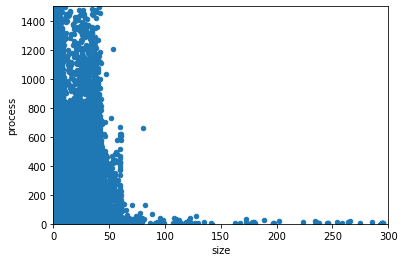

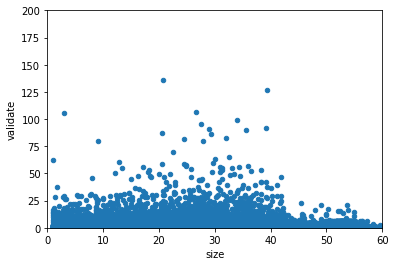

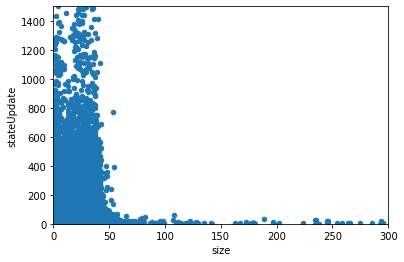

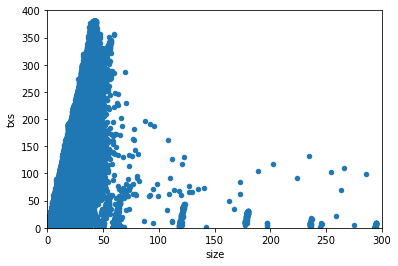

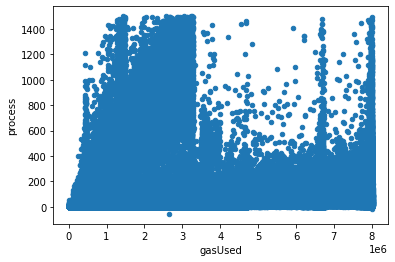

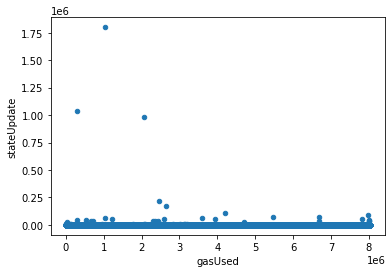

In [3]:
fig, ax1 = plt.subplots()
ax1.set_xlim(0, 300)
ax1.set_ylim(0, 1500)
KiBDF.plot.scatter(x="size", y="process", ax=ax1)

fig, ax2 = plt.subplots()
ax2.set_xlim(0, 60)
ax2.set_ylim(0, 200)
KiBDF.plot.scatter(x="size", y="validate", ax=ax2)

fig, ax3 = plt.subplots()
ax3.set_xlim(0, 300)
ax3.set_ylim(0, 1500)
KiBDF.plot.scatter(x="size", y="stateUpdate", ax=ax3)

fig, ax4 = plt.subplots()
ax4.set_xlim(0, 300)
ax4.set_ylim(0, 400)
KiBDF.plot.scatter(x="size", y="txs", ax=ax4)


# KiBDF.plot.scatter(x="txs", y="process")

# fig, ax5 = plt.subplots()
# ax5.set_xlim(0, 1)
# ax5.set_ylim(0, 40)
KiBDF.plot.scatter(x="gasUsed", y="process")
KiBDF.plot.scatter(x="gasUsed", y="stateUpdate")



# sns.regplot(KiBDF['size'], KiBDF['process'], ax=ax, truncate=False)
# plt.show()

# sns.regplot(KiBDF['size'], KiBDF['validate'], ax=ax, truncate=False)
# plt.show()

# sns.regplot(KiBDF['size'], KiBDF['stateUpdate'], ax=ax, truncate=False)
# plt.show()

In [4]:
byteDF = data.loc[data["format"] == "B"]
byteDF["combined"] = byteDF['size'].astype(str) + byteDF['format']
byteDF = byteDF.drop(columns=["format"])
byteDF = byteDF.sort_values(by=['size'])

/var/folders/x_/z958j531653_ntl897qz7wfc0000gn/T/ipykernel_72675/1368433035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  byteDF["combined"] = byteDF['size'].astype(str) + byteDF['format']


<AxesSubplot:xlabel='gasUsed', ylabel='stateUpdate'>

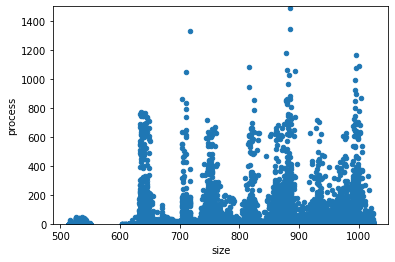

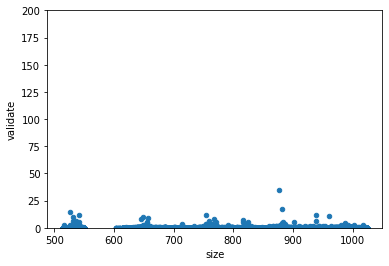

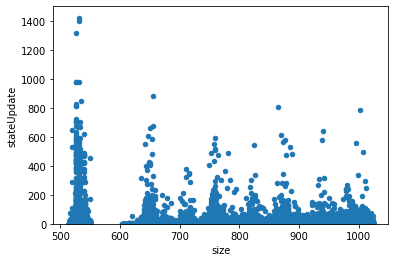

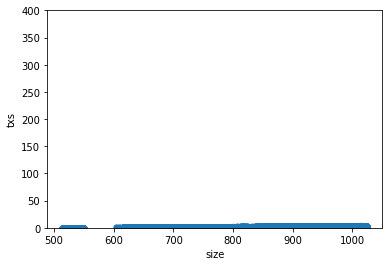

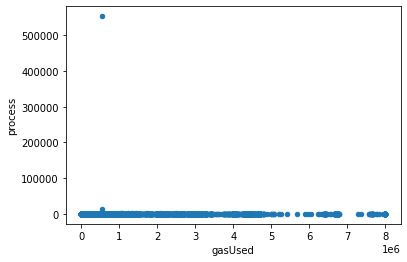

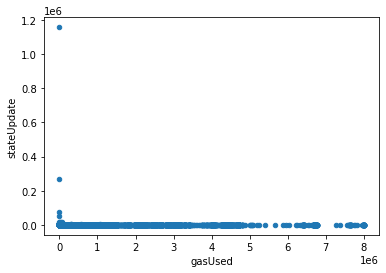

In [5]:
fig, ax1 = plt.subplots()
# ax1.set_xlim(0, 300)
ax1.set_ylim(0, 1500)
byteDF.plot.scatter(x="size", y="process", ax=ax1)

fig, ax2 = plt.subplots()
# ax2.set_xlim(0, 60)
ax2.set_ylim(0, 200)
byteDF.plot.scatter(x="size", y="validate", ax=ax2)

fig, ax3 = plt.subplots()
# ax3.set_xlim(0, 300)
ax3.set_ylim(0, 1500)
byteDF.plot.scatter(x="size", y="stateUpdate", ax=ax3)

fig, ax4 = plt.subplots()
# ax4.set_xlim(0, 300)
ax4.set_ylim(0, 400)
byteDF.plot.scatter(x="size", y="txs", ax=ax4)


# KiBDF.plot.scatter(x="txs", y="process")

# fig, ax5 = plt.subplots()
# ax5.set_xlim(0, 1)
# ax5.set_ylim(0, 40)
byteDF.plot.scatter(x="gasUsed", y="process")
byteDF.plot.scatter(x="gasUsed", y="stateUpdate")